# Scenario Testing - Labelling Consistency Test
1. Load the existing dataset.
2. Run the Labelling Quality on the dataset.
3. Interchange the annotations 0.5% images, to create a labelling inconsistency of 1%.
4. Run the test on the created dataset
5. Compare the result with the dataset without introduced issue.

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

## 1. Load the existing dataset

In [2]:
dataset_path = "road-segment-dataset"
issue_dataset_path = "road-segment-dataset-updated"
mask_dir = "mask"
image_dir = "rgb"

In [3]:
def get_dataset_info(dataset_path, image_dir, mask_dir):
    """
    Collect information about the dataset such as count, resolution,
    and whether each image has a corresponding annotation. Also returns a
    DataFrame containing the percentage of non-zero columns for each mask.
    Additionally, includes information about unique classes in the masks.
    """
    image_info = {
        "total_images": 0,
        "resolutions": set(),
        "images_with_annotations": 0,
        "unique_classes": set()  # Set to store unique classes
    }
    non_zero_columns_info = []

    image_path = os.path.join(dataset_path, image_dir)
    mask_path = os.path.join(dataset_path, mask_dir)

    for image_file in os.listdir(image_path):
        if image_file.endswith('.png'):
            image_info["total_images"] += 1
            image = Image.open(os.path.join(image_path, image_file))
            image_info["resolutions"].add(image.size)

            # Check if corresponding annotation exists
            mask_file = os.path.join(mask_path, image_file)
            if os.path.exists(mask_file):
                image_info["images_with_annotations"] += 1
                mask = Image.open(mask_file)
                mask_array = np.array(mask)
                unique_classes_in_mask = set(np.unique(mask_array))
                image_info["unique_classes"].update(unique_classes_in_mask)

                non_zero_columns = np.any(mask_array > 0, axis=0)
                non_zero_columns_percent = 100 * np.sum(non_zero_columns) / mask_array.shape[1]
                non_zero_columns_info.append({"image": image_file, "non_zero_columns_percent": non_zero_columns_percent})

    non_zero_columns_df = pd.DataFrame(non_zero_columns_info)

    # Convert the set of unique classes to a list for better readability
    image_info["unique_classes"] = list(image_info["unique_classes"])

    return image_info, non_zero_columns_df

# def visualize_samples(dataset_path, image_dir, mask_dir, num_samples=3):
#     """
#     Visualize a few samples of images, labels, and labels overlayed on the images.
#     """
#     image_path = os.path.join(dataset_path, image_dir)
#     mask_path = os.path.join(dataset_path, mask_dir)

#     images = os.listdir(image_path)
#     samples = np.random.choice(images, size=min(num_samples, len(images)), replace=False)

#     for sample in samples:
#         img = Image.open(os.path.join(image_path, sample))
#         mask = Image.open(os.path.join(mask_path, sample))

#         plt.figure(figsize=(12, 4))

#         plt.subplot(1, 3, 1)
#         plt.imshow(img)
#         plt.title('Image')
#         plt.axis('off')

#         plt.subplot(1, 3, 2)
#         plt.imshow(mask, cmap='gray')
#         plt.title('Label')
#         plt.axis('off')

#         plt.subplot(1, 3, 3)
#         plt.imshow(img)
#         plt.imshow(mask, cmap='gray', alpha=0.4)
#         plt.title('Overlay')
#         plt.axis('off')

#         plt.show()
def visualize_image_and_mask(image_path, mask_path):
    """
    Visualize a single image and its mask.
    """
    img = Image.open(image_path)
    mask = Image.open(mask_path)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Label')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(img)
    plt.imshow(mask, cmap='gray', alpha=0.4)
    plt.title('Overlay')
    plt.axis('off')

    plt.show()
    
def visualize_samples(dataset_path, image_dir, mask_dir, num_samples=3):
    """
    Visualize a few samples of images, labels, and labels overlayed on the images.
    """
    image_path = os.path.join(dataset_path, image_dir)
    mask_path = os.path.join(dataset_path, mask_dir)

    images = os.listdir(image_path)
    samples = np.random.choice(images, size=min(num_samples, len(images)), replace=False)

    for sample in samples:
        img_path = os.path.join(image_path, sample)
        msk_path = os.path.join(mask_path, sample)

        visualize_image_and_mask(img_path, msk_path)


Dataset Information: {'total_images': 354, 'resolutions': {(1024, 1024)}, 'images_with_annotations': 354, 'unique_classes': [0, 255]}


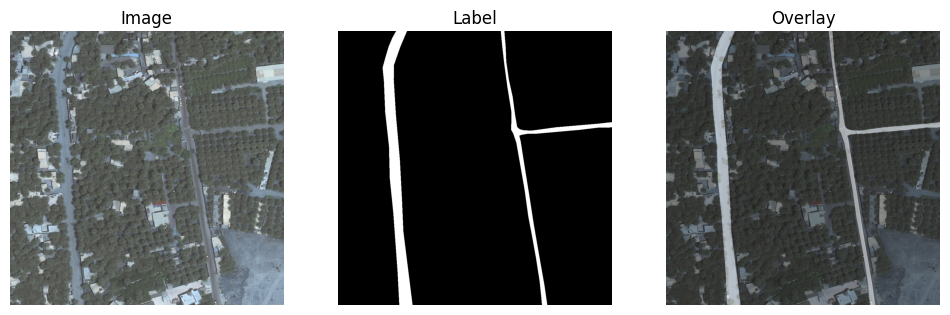

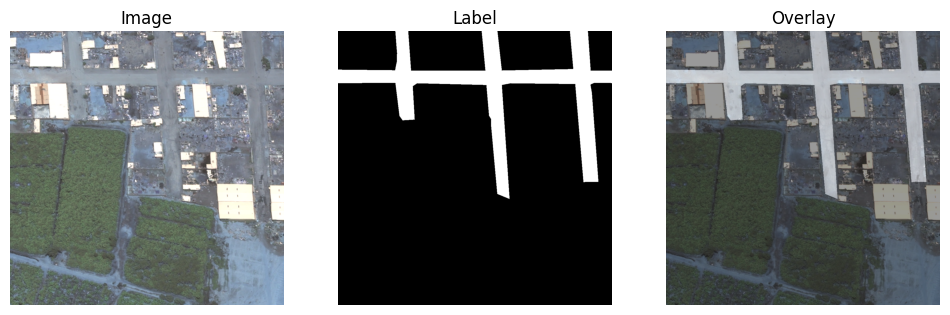

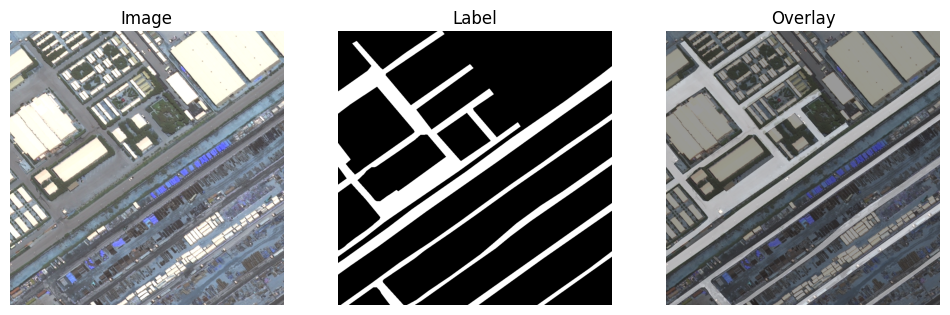

In [4]:
# Get dataset information
info, non_zero_columns_df = get_dataset_info(dataset_path, image_dir, mask_dir)
print("Dataset Information:", info)

# Visualize samples
visualize_samples(issue_dataset_path, image_dir, mask_dir)

In [5]:
non_zero_columns_df.sort_values(by='non_zero_columns_percent', ascending=True)

image  non_zero_columns_percent
175  207.png                 11.230469
31   316.png                 11.230469
303  163.png                 11.230469
341   81.png                 11.230469
78   100.png                 11.914062
..       ...                       ...
225  172.png                100.000000
74   330.png                100.000000
227  322.png                100.000000
90   182.png                100.000000
353  232.png                100.000000

[354 rows x 2 columns]

## 2. Run the Labelling Consistency Test on this dataset

In [6]:
%cd Annotation_Consistency_Package

/home/ubuntu/1.1Tdisk/LabellingConsistencyv2/Annotation_Consistency_Package


In [7]:
from raga_models.analysis import MistakeScoreCalculator

In [8]:
%cd ..

/home/ubuntu/1.1Tdisk/LabellingConsistencyv2


In [11]:
image_folders = ["/home/ubuntu/1000GB/medical_dataset_and_script/data/images-final"]  
annotation_folders = ["/home/ubuntu/1000GB/medical_dataset_and_script/data/annotations-tiff"]  
calculator = MistakeScoreCalculator(image_folders, annotation_folders)
df_sorted = calculator.calculate_mistake_score()
print(df_sorted)

Extracting segments: 100%|██████████| 2379/2379 [01:57<00:00, 20.22it/s]
Identifying features: 95it [00:10,  9.26it/s]


epoch [1/100], loss:0.0503
test loss: 0.0476
Saving model with test loss: 0.0476
epoch [2/100], loss:0.0507
test loss: 0.0469
Saving model with test loss: 0.0469
epoch [3/100], loss:0.0514
test loss: 0.0463
Saving model with test loss: 0.0463
epoch [4/100], loss:0.0513
test loss: 0.0457
Saving model with test loss: 0.0457
epoch [5/100], loss:0.0506
test loss: 0.0451
Saving model with test loss: 0.0451
epoch [6/100], loss:0.0502
test loss: 0.0445
Saving model with test loss: 0.0445
epoch [7/100], loss:0.0474
test loss: 0.0440
Saving model with test loss: 0.0440
epoch [8/100], loss:0.0442
test loss: 0.0434
Saving model with test loss: 0.0434
epoch [9/100], loss:0.0447
test loss: 0.0428
Saving model with test loss: 0.0428
epoch [10/100], loss:0.0449
test loss: 0.0423
Saving model with test loss: 0.0423
epoch [11/100], loss:0.0472
test loss: 0.0417
Saving model with test loss: 0.0417
epoch [12/100], loss:0.0439
test loss: 0.0412
Saving model with test loss: 0.0412
epoch [13/100], loss:0.04

In [10]:
df_sorted

NameError: name 'df_sorted' is not defined

In [14]:
image_folders = [f"{issue_dataset_path}/{image_dir}"]  
annotation_folders = [f"{issue_dataset_path}/{mask_dir}"]  
calculator = MistakeScoreCalculator(image_folders, annotation_folders)
df_sorted = calculator.calculate_mistake_score()
print(df_sorted)

Extracting segments: 100%|██████████| 354/354 [00:45<00:00,  7.72it/s]
Identifying features: 223it [02:13,  1.67it/s]


epoch [1/100], loss:0.0638
test loss: 0.0614
Saving model with test loss: 0.0614
epoch [2/100], loss:0.0644
test loss: 0.0606
Saving model with test loss: 0.0606
epoch [3/100], loss:0.0644
test loss: 0.0599
Saving model with test loss: 0.0599
epoch [4/100], loss:0.0628
test loss: 0.0593
Saving model with test loss: 0.0593
epoch [5/100], loss:0.0606
test loss: 0.0587
Saving model with test loss: 0.0587
epoch [6/100], loss:0.0615
test loss: 0.0582
Saving model with test loss: 0.0582
epoch [7/100], loss:0.0594
test loss: 0.0577
Saving model with test loss: 0.0577
epoch [8/100], loss:0.0610
test loss: 0.0573
Saving model with test loss: 0.0573
epoch [9/100], loss:0.0588
test loss: 0.0569
Saving model with test loss: 0.0569
epoch [10/100], loss:0.0598
test loss: 0.0566
Saving model with test loss: 0.0566
epoch [11/100], loss:0.0576
test loss: 0.0563
Saving model with test loss: 0.0563
epoch [12/100], loss:0.0582
test loss: 0.0558
Saving model with test loss: 0.0558
epoch [13/100], loss:0.05

In [15]:
df_sorted.head(20)

filename                mistake_score
0       124                 {'255': 1.0}
1         8                 {'255': 1.0}
2       181                 {'255': 1.0}
3       133                 {'255': 1.0}
4       285                 {'255': 1.0}
5       175                 {'255': 1.0}
6        35                 {'255': 1.0}
7        25                 {'255': 1.0}
8        53                 {'255': 1.0}
9       265   {'255': 0.992884283139214}
10      268   {'255': 0.992884283139214}
11      249   {'255': 0.992884283139214}
12      350   {'255': 0.992884283139214}
13      305   {'255': 0.992884283139214}
14      246   {'255': 0.992884283139214}
15      335   {'255': 0.992884283139214}
16      178   {'255': 0.992884283139214}
17      258   {'255': 0.992884283139214}
18      281  {'255': 0.9038485379451047}
19      320  {'255': 0.9038485379451047}

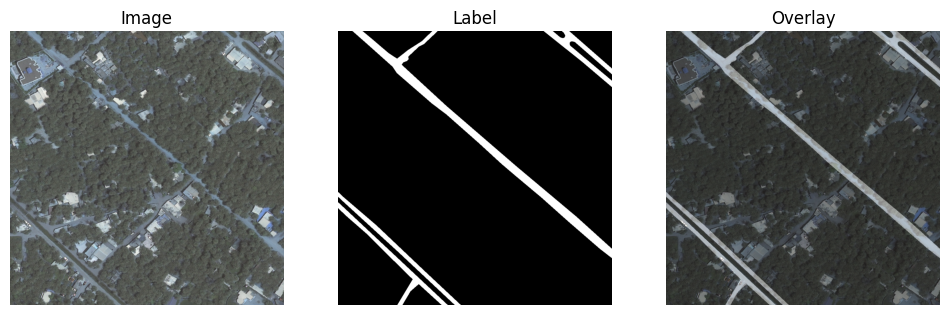

In [16]:
visualize_image_and_mask(image_path=f"{dataset_path}/{image_dir}/309.png",
                         mask_path=f"{dataset_path}/{mask_dir}/309.png")

In [17]:
df_sorted.filename.iloc[0]

'124'

In [18]:
df_sorted.loc[df_sorted['filename'] == '1']

filename                mistake_score
101        1  {'255': 0.5094108542091408}

## Introducing issues

In [ ]:

selected_row = df_sorted.sample().iloc[0]

In [ ]:
os.listdir(image_folders[0])

['193.png',
 '162.png',
 '148.png',
 '327.png',
 '209.png',
 '242.png',
 '252.png',
 '285.png',
 '274.png',
 '123.png',
 '75.png',
 '68.png',
 '143.png',
 '74.png',
 '34.png',
 '52.png',
 '45.png',
 '244.png',
 '243.png',
 '251.png',
 '238.png',
 '254.png',
 '6.png',
 '178.png',
 '303.png',
 '63.png',
 '111.png',
 '198.png',
 '22.png',
 '268.png',
 '319.png',
 '316.png',
 '218.png',
 '69.png',
 '186.png',
 '86.png',
 '109.png',
 '248.png',
 '64.png',
 '147.png',
 '15.png',
 '192.png',
 '241.png',
 '219.png',
 '65.png',
 '194.png',
 '231.png',
 '54.png',
 '7.png',
 '136.png',
 '168.png',
 '240.png',
 '43.png',
 '200.png',
 '158.png',
 '295.png',
 '339.png',
 '228.png',
 '134.png',
 '118.png',
 '62.png',
 '220.png',
 '49.png',
 '173.png',
 '199.png',
 '287.png',
 '269.png',
 '309.png',
 '138.png',
 '58.png',
 '332.png',
 '272.png',
 '9.png',
 '20.png',
 '330.png',
 '345.png',
 '279.png',
 '266.png',
 '100.png',
 '201.png',
 '171.png',
 '205.png',
 '340.png',
 '156.png',
 '125.png',
 '50.

1: Displaying 285.png


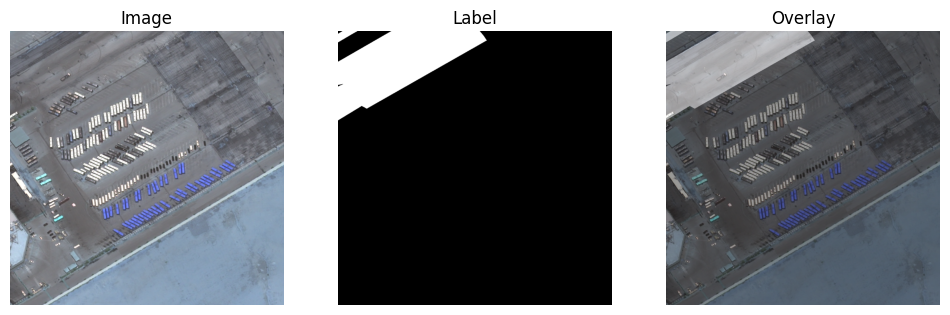

2: Displaying 181.png


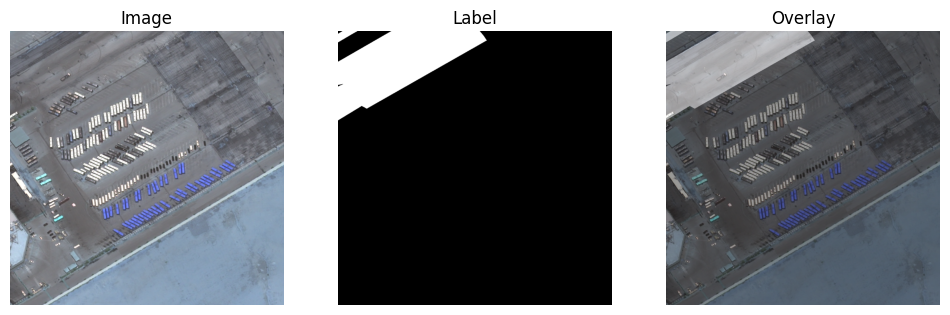

3: Displaying 35.png


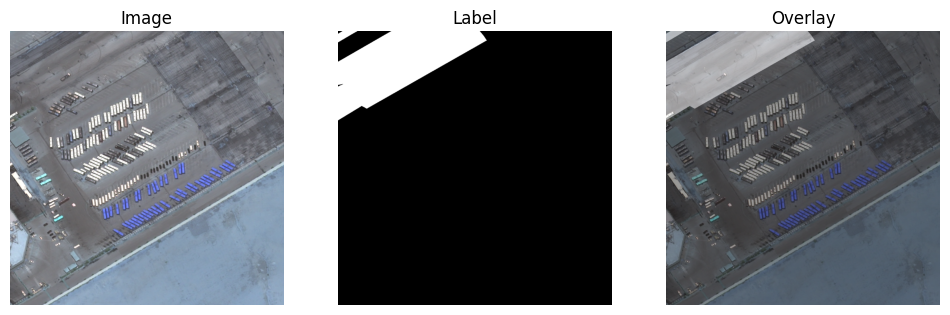

4: Displaying 8.png


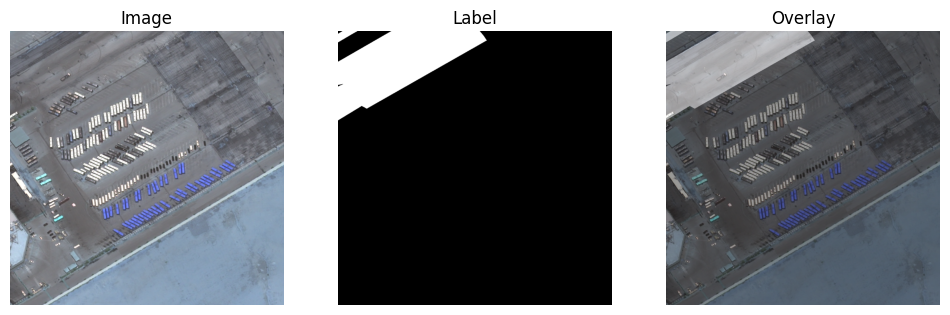

5: Displaying 175.png


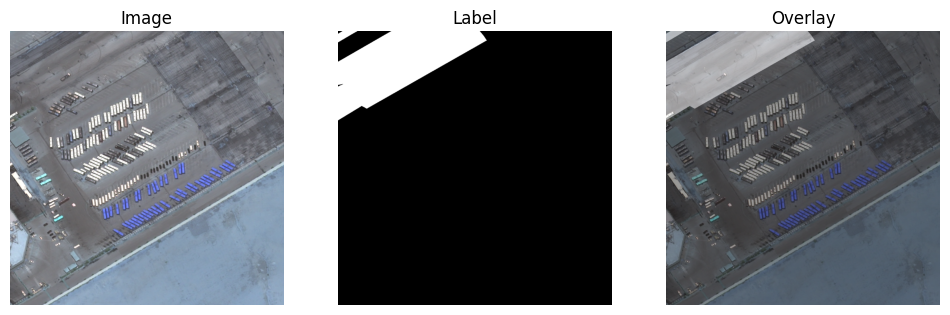

6: Displaying 53.png


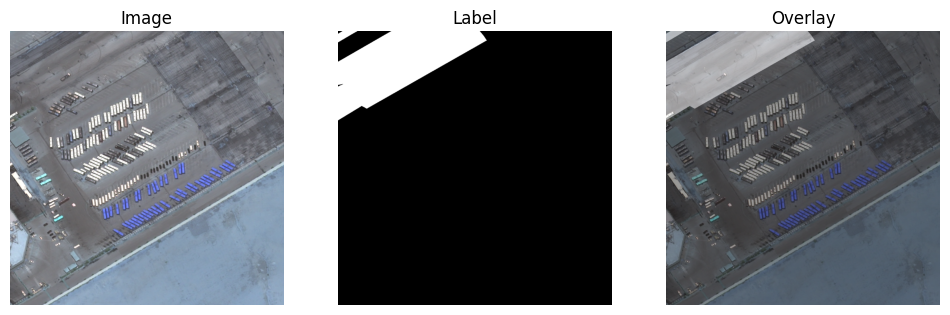

7: Displaying 25.png


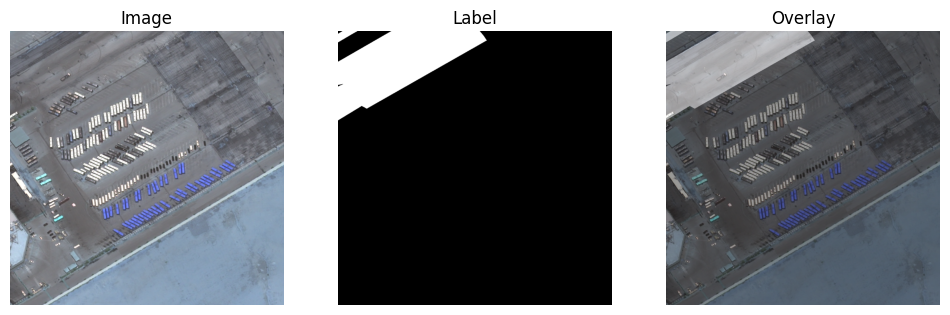

8: Displaying 124.png


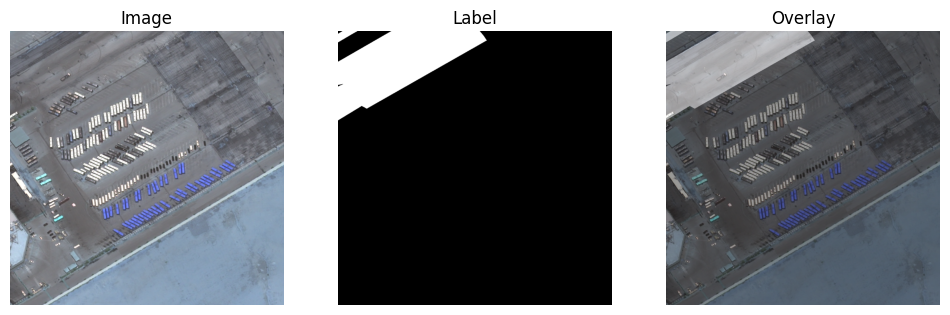

9: Displaying 133.png


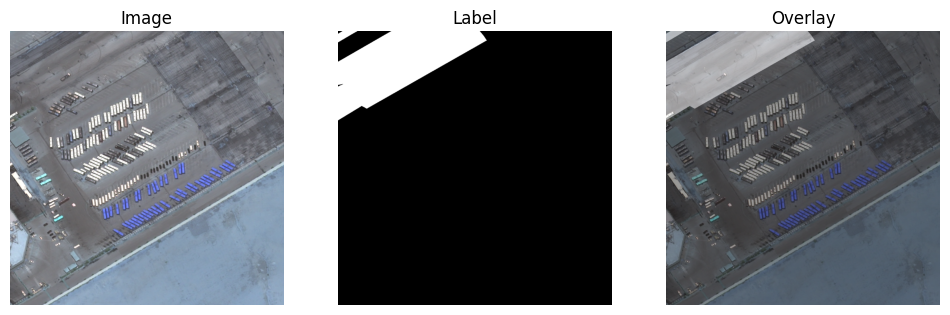

In [ ]:
c = 0
for idx, row in df_sorted.iterrows():
    c += 1
    x = f"{row.filename}.png"
        
    if row.mistake_score['255'] >= 1:
        print(f"{c}: Displaying {x}")
        visualize_image_and_mask(image_path=f"{dataset_path}/{image_dir}/{x}",
                                mask_path=f"{dataset_path}/{mask_dir}/{x}")

In [ ]:
# # Checking Duplicates
# import os
# import imagehash
# from PIL import ImageDraw, ImageFont


# def get_image_files(folder_path):
#     """Retrieve image files from a given folder."""
#     extensions = {".jpg", ".jpeg", ".png", ".gif", ".bmp"}
#     for entry in os.scandir(folder_path):
#         if entry.is_file() and entry.path.lower().endswith(tuple(extensions)):
#             yield entry.path

# def compute_dhash(image_path):
#     """Compute the dHash for an image."""
#     with Image.open(image_path) as img:
#         return imagehash.dhash(img)

# def pair_and_save_duplicates(image_path1, image_path2, output_folder):
#     """Pair two images side by side and save them in the output folder with filenames."""
#     images = [Image.open(x) for x in [image_path1, image_path2]]
#     widths, heights = zip(*(i.size for i in images))

#     total_width = sum(widths)
#     max_height = max(heights) + 50  # Extra space for text

#     new_im = Image.new('RGB', (total_width, max_height), (255, 255, 255))
#     draw = ImageDraw.Draw(new_im)

#     # Optionally, specify a font. Default font will be used if not specified.
#     # font = ImageFont.truetype("arial.ttf", 16)

#     x_offset = 0
#     for i, im in enumerate(images):
#         new_im.paste(im, (x_offset, 50))
#         # Draw filename. Adjust positioning and font as needed.
#         # draw.text((x_offset, 0), os.path.basename([image_path1, image_path2][i]), fill=(0, 0, 0), font=font)
#         draw.text((x_offset, 0), os.path.basename([image_path1, image_path2][i]), fill=(0, 0, 0))
#         x_offset += im.size[0]

#     output_path = os.path.join(output_folder, os.path.basename(image_path1))
#     new_im.save(output_path)

# def find_duplicates(folders, output_folder):
#     """Find duplicates, save paired images, and return unique image count."""
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)

#     hash_dict = {}
#     unique_count = 0

#     for folder in folders:
#         for image_file in get_image_files(folder):
#             image_hash = compute_dhash(image_file)

#             if image_hash in hash_dict:
#                 pair_and_save_duplicates(image_file, hash_dict[image_hash], output_folder)
#             else:
#                 hash_dict[image_hash] = image_file
#                 unique_count += 1

#     return unique_count


# folders = [f"{dataset_path}/{image_dir}"] 
# duplicates = find_duplicates(folders, output_folder="duplicates")

# print(f"{len(duplicates)} duplicates found!")
# for dup in duplicates:
#     print(f"Duplicate found: {dup[0]} and {dup[1]}")

In [ ]:
import os
from PIL import Image, ImageDraw, ImageFont
import imagehash

def get_image_files(folder_path):
    """Retrieve image files from a given folder."""
    extensions = {".jpg", ".jpeg", ".png", ".gif", ".bmp"}
    for entry in os.scandir(folder_path):
        if entry.is_file() and entry.path.lower().endswith(tuple(extensions)):
            yield entry.path

def compute_dhash(image_path):
    """Compute the dHash for an image."""
    with Image.open(image_path) as img:
        return imagehash.dhash(img)

def pair_and_save_duplicates(image_paths, output_folder):
    """Pair images side by side and save them in the output folder with filenames."""
    images = [Image.open(x) for x in image_paths]
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights) + 50  # Extra space for text

    new_im = Image.new('RGB', (total_width, max_height), (255, 255, 255))
    draw = ImageDraw.Draw(new_im)
    
    font_size = 40
    font = ImageFont.truetype("Roboto/Roboto-Medium.ttf", font_size)

    x_offset = 0
    for i, im in enumerate(images):
        new_im.paste(im, (x_offset, 50))
        draw.text((x_offset, 0), os.path.basename(image_paths[i]), fill=(0, 0, 0))
        x_offset += im.size[0]

    output_filename = "Duplicates_" + os.path.basename(image_paths[0])
    output_path = os.path.join(output_folder, output_filename)
    new_im.save(output_path)

def find_duplicates(folders, output_folder):
    """Find duplicates, save paired images, and return unique image count."""
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    hash_dict = {}
    unique_count = 0

    for folder in folders:
        for image_file in get_image_files(folder):
            image_hash = compute_dhash(image_file)

            if image_hash in hash_dict:
                hash_dict[image_hash].append(image_file)
            else:
                hash_dict[image_hash] = [image_file]
                unique_count += 1

    for hashes, images in hash_dict.items():
        if len(images) > 1:
            pair_and_save_duplicates(images, output_folder)

    return unique_count

folders = [f"{dataset_path}/{image_dir}"] 
unique_count = find_duplicates(folders, output_folder="duplicates")

print(f"No of unique images: {unique_count}")
# print(f"{len(duplicates)} duplicates found!")
# for dup in duplicates:
#     print(f"Duplicate found: {dup[0]} and {dup[1]}")

No of duplicates: 68


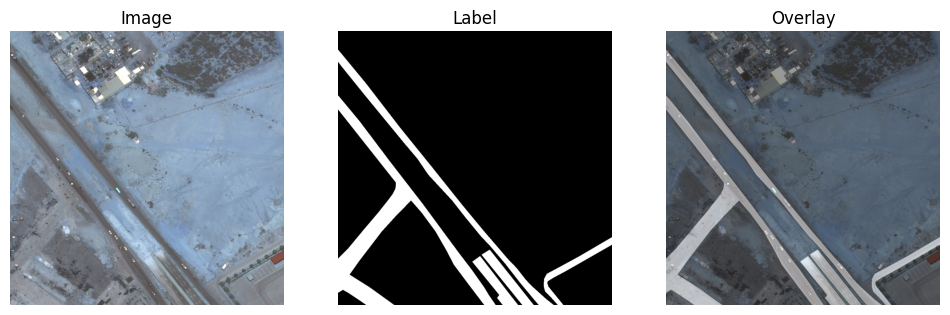

In [ ]:
Image.open(f"{dataset_path}/{image_dir}/1.png")
visualize_image_and_mask(image_path=f"{dataset_path}/{image_dir}/1.png",
                         mask_path=f"{dataset_path}/{mask_dir}/1.png")

In [ ]:
dataset_path = "road-segment-dataset"
issue_dataset_path = "road-segment-dataset-updated"
mask_dir = "mask"
image_dir = "rgb"

In [10]:
import cv2 

file = "1.png"

anno = cv2.imread(f"{dataset_path}/{mask_dir}/{file}")
# cv2.imwrite(f"{issue_dataset_path}/{mask_dir}/{file}", (np.ones_like(anno) * 255).astype(np.uint8)[:,:,0])
# Image.open(f"{issue_dataset_path}/{mask_dir}/{file}").size

(1024, 1024)

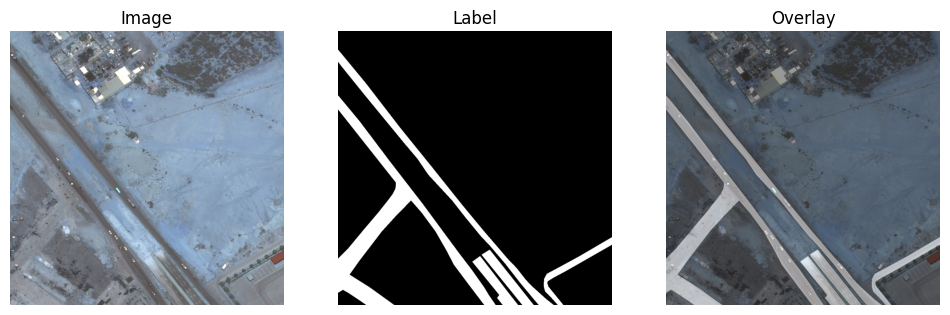

In [11]:
Image.open(f"{dataset_path}/{image_dir}/1.png")
visualize_image_and_mask(image_path=f"{dataset_path}/{image_dir}/1.png",
                         mask_path=f"{dataset_path}/{mask_dir}/1.png")

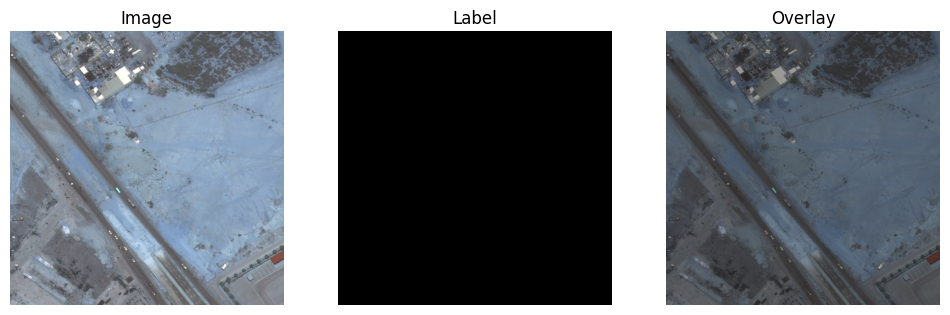

In [12]:
Image.open(f"{dataset_path}/{image_dir}/1.png")
visualize_image_and_mask(image_path=f"{dataset_path}/{image_dir}/1.png",
                         mask_path=f"{issue_dataset_path}/{mask_dir}/1.png")